## <center> Online News Popularity Prediction

## Libraries Import

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab

import warnings
warnings.filterwarnings('ignore')

    
%matplotlib inline

#Loading Dataset
df = pd.read_csv(r"C:\Users\Zou\Downloads\OnlineNewsPopularity\OnlineNewsPopularity\OnlineNewsPopularity.csv")

## Exploratory Data Analysis

In [2]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.isnull().any().sum()

0

#### The columns name in our dataset have some extra space so we'll remove it by applying the  STRIP() function.

In [4]:
df = df.rename(columns=lambda x: x.strip())

#### We'll extract  the date from the URL column & add a MONTH column it could be useful later in our analysis. 


In [5]:
df['date'] = df['url'].str.extract('(..../../..)', expand=True)
df['date']=pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month


df = df.drop(['url', 'date'], axis=1)

In [6]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,month
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184,6.615856
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749,3.390683
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000,4.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,7.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000,10.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,12.000000


# Working on the TARGET (shares)

In [7]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

#### Shares distribution

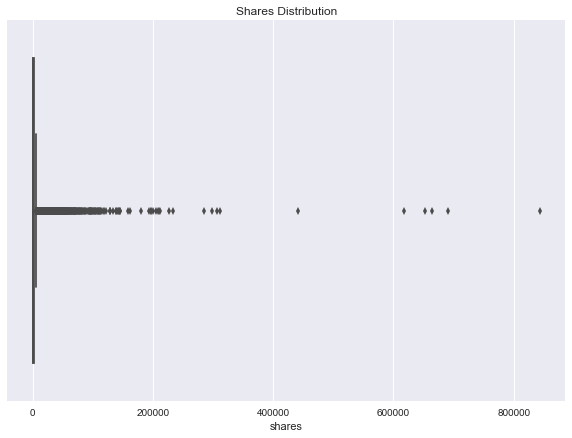

In [8]:
sns.set(rc={'figure.figsize':(10,7)})
plt.title('Shares Distribution')
sns.boxplot(df.shares)

#### We can see that theres a lot of outliers, and this boxplot isn't really helping to understand the distribution of our target

In [9]:
print('Maximum Shares :', df['shares'].max())
print('Minimum Shares :', df['shares'].min())
print('Mean Shares :', round(df['shares'].mean()))
print('Median Shares :', df['shares'].median())


Maximum Shares : 843300
Minimum Shares : 1
Mean Shares : 3395
Median Shares : 1400.0


In [10]:
print(df[df.shares > 200000].shares.count(),
df[df.shares > 50000].shares.count(),
df[df.shares > 25000].shares.count(),
df[df.shares > 22500].shares.count(),
df[df.shares > 20000].shares.count(),
df[df.shares > 17500].shares.count())

17 203 569 678 818 1002


#### We'll filter at 22500 Shares so we'll only be loosing 1.71% of our data which is definitely not a lot.

In [11]:
df = df[df['shares'] < 22500]

No handles with labels found to put in legend.


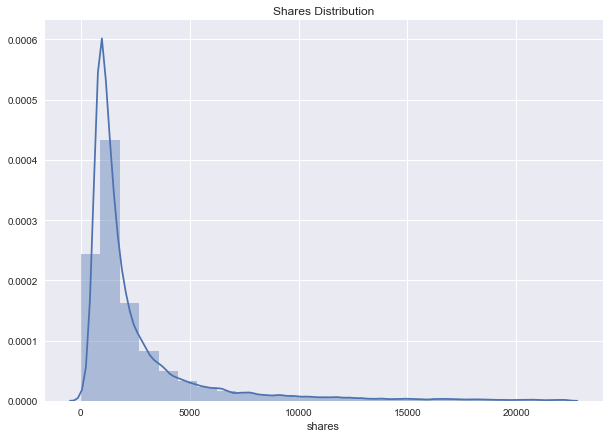

In [12]:
plt.title('Shares Distribution')
sns.distplot(df.shares, bins = 25, norm_hist=False, kde=True)
plt.legend()
plt.show()

#### The distribution of our target is skewed, we'll apply a logarithmic scaling to approximately conform our data to normality.

In [13]:
df['logShares'] = np.log1p(df.shares)

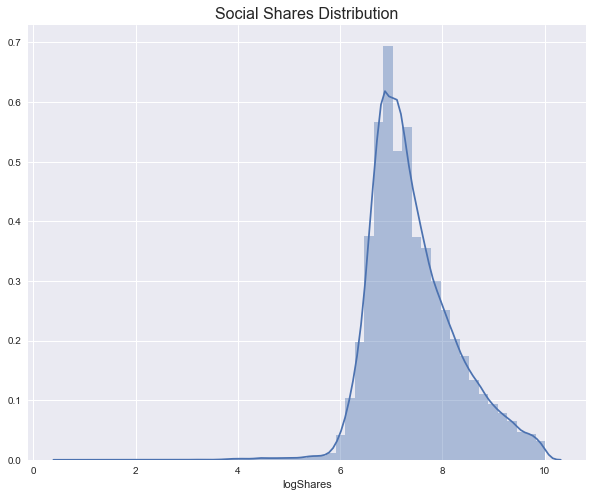

In [14]:
plt.figure(figsize = (10,8))
plt.title('Social Shares Distribution', fontsize = 16)
sns.distplot(df.logShares, bins = 50, norm_hist=False, kde=True)
plt.show()

In [15]:
df.logShares.describe()

count    38961.000000
mean         7.420181
std          0.833389
min          0.693147
25%          6.845880
50%          7.244942
75%          7.901377
max         10.012387
Name: logShares, dtype: float64

# Features Engineering

## Categorical Features

In [16]:
Features = df.drop(['shares', 'logShares'], axis=1)

In [17]:
Features.shape, Features.columns

((38961, 60),
 Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
        'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
        'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
        'num_keywords', 'data_channel_is_lifestyle',
        'data_channel_is_entertainment', 'data_channel_is_bus',
        'data_channel_is_socmed', 'data_channel_is_tech',
        'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
        'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
        'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
        'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
        'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
        'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
        'global_sentiment_polarity', 'global_rate_p

In [18]:
Channels = ['data_channel_is_lifestyle',
        'data_channel_is_entertainment', 'data_channel_is_bus',
        'data_channel_is_socmed', 'data_channel_is_tech',
        'data_channel_is_world']

Days = ['weekday_is_monday', 'weekday_is_tuesday',
        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
        'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']

Days = df[Days]
Channels = df[Channels]

### Monthly Shares Distribution

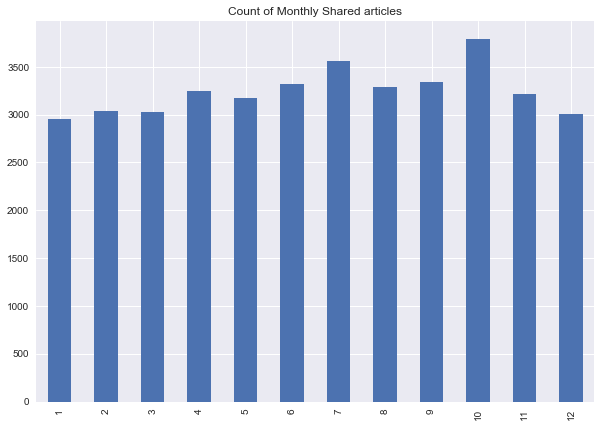

In [19]:
Month = df['month'].value_counts().sort_index(ascending=True)


plt.title('Count of Monthly Shared articles')
Month.plot.bar()

#### TOP 3 MONTHS WITH THE MOST SHARED ARTICLES 

In [20]:
print("Top 3 months with the most shared articles :\n")

print(Month.sort_values(ascending=False).head(3))

Top 3 months with the most shared articles :

10    3789
7     3561
9     3346
Name: month, dtype: int64


### Week Days Distribution

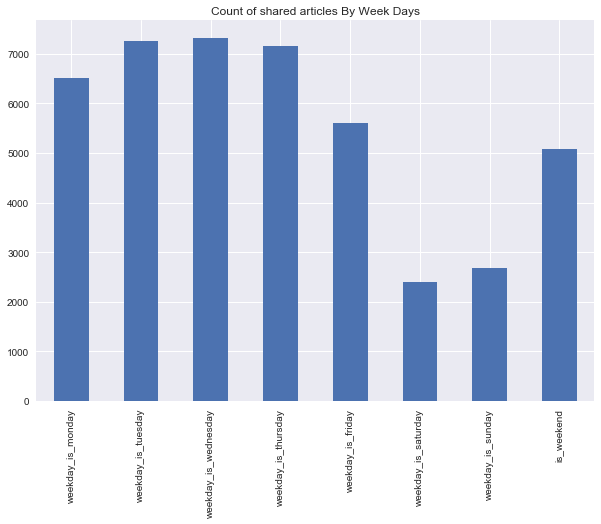

In [21]:
plt.title('Count of shared articles By Week Days')
Days.sum().plot.bar()

#### TOP 3 Days  with the most shares

In [22]:
print("Top 3 days with the most shared articles :")
print(Days.sum().sort_values(ascending=False).head(3))


Top 3 days with the most shared articles :
weekday_is_wednesday    7313.0
weekday_is_tuesday      7270.0
weekday_is_thursday     7154.0
dtype: float64


#### As we saw above the median of our target is 1400, so we can state that every article with 1400 or more shares is Popular & every article with less than 1400 shares in unpopular

#### Count of popular & unpopular articles over week days

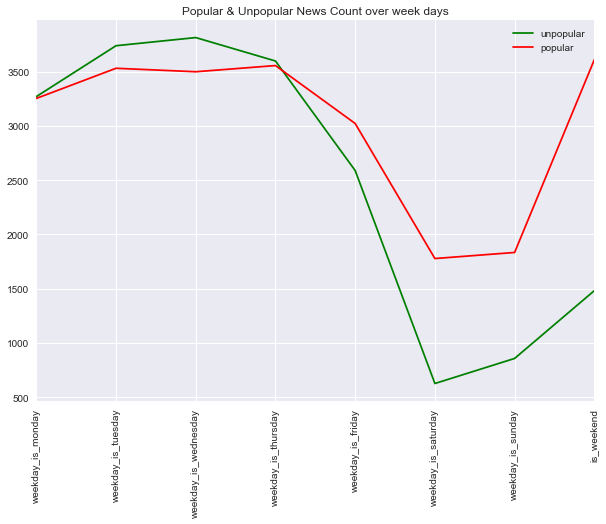

In [23]:
days = ['weekday_is_monday', 'weekday_is_tuesday',
        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
        'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']

unpopular = df[df['shares'] < 1400 ]
popular = df[df['shares'] >= 1400]

unpopularDays = unpopular[days].sum()
popularDays = popular[days].sum()

plt.title("Popular & Unpopular News Count over week days")
ax = unpopularDays.plot(color='g', label="unpopular")
popularDays.plot(ax=ax, color='r', label="popular")
plt.legend()
plt.xticks(rotation=90)
plt.show()

#### It's interesting to observe that there is more unpopular news (< 1400 shares) shared over the period monday to thursday. We can then state that an article published from thursday to sunday has significantly more chances to be a popular article (to get more than 1400 shares).

### Channels Distribution

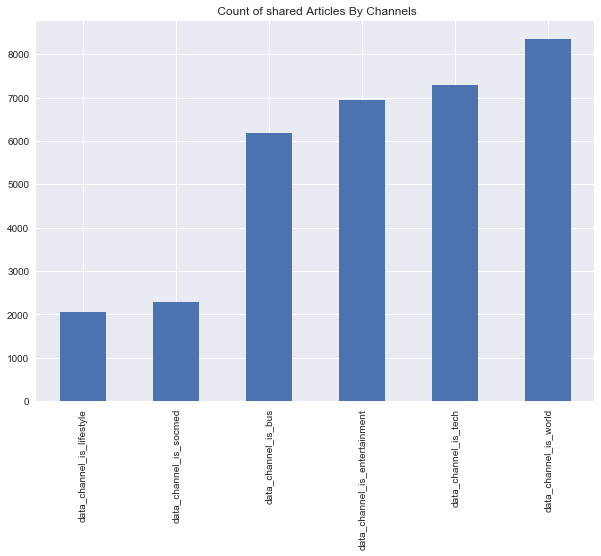

In [24]:
plt.title(' Count of shared Articles By Channels')
Channels.sum().sort_values(ascending=True).plot.bar()

#### Top 3 channels with the most shares

In [25]:
print ("Top 3 Channels are :\n" , 
Channels.sum().sort_values(ascending=False).head(3))

Top 3 Channels are :
 data_channel_is_world            8359.0
data_channel_is_tech             7279.0
data_channel_is_entertainment    6935.0
dtype: float64


##### Unfortunatly there is no way to know if an article can get multiple tags

#### Count of popular & unpopular news over channels

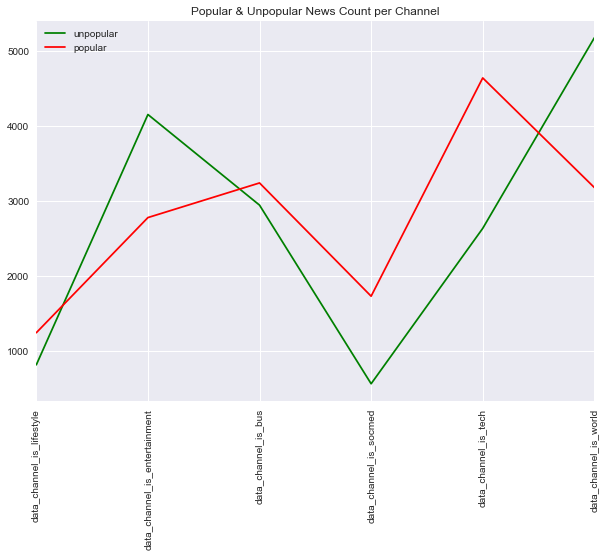

In [26]:
channels = ['data_channel_is_lifestyle',
        'data_channel_is_entertainment', 'data_channel_is_bus',
        'data_channel_is_socmed', 'data_channel_is_tech',
        'data_channel_is_world']

unpopularChannels = unpopular[channels].sum()
popularChannels = popular[channels].sum()

plt.title("Popular & Unpopular News Count per Channel")
ax = unpopularChannels.plot(color='g', label="unpopular")
popularChannels.plot(ax=ax, color='r', label="popular")
plt.legend()
plt.xticks(rotation=90)

plt.show()

In [27]:
print ("Top 3 popular Channels are : \n" , 
popularChannels.sort_values(ascending=False).head(3))

Top 3 popular Channels are : 
 data_channel_is_tech     4643.0
data_channel_is_bus      3242.0
data_channel_is_world    3181.0
dtype: float64


In [28]:
print ("Top unpopular Channel is : \n" , 
popularChannels.sort_values(ascending=True).head(1))

Top unpopular Channel is : 
 data_channel_is_lifestyle    1244.0
dtype: float64


# Numerical Features 

In [29]:
numerical = df[['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']]

In [30]:
numerical.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,38961.000000,38961.000000,38961.000000,38961.000000,38961.000000,38961.000000,38961.000000,38961.000000,38961.000000,38961.000000,...,38961.000000,38961.000000,38961.000000,38961.000000,38961.000000,38961.000000,38961.000000,38961.000000,38961.000000,38961.000000
mean,10.392957,547.316624,0.548565,0.997510,0.689818,10.829778,3.300814,4.504145,1.238007,4.551379,...,0.353681,0.095373,0.756748,-0.258996,-0.521112,-0.107382,0.281372,0.071010,0.341883,0.155275
std,2.112432,470.507241,3.551358,5.276782,3.293196,11.223190,3.865509,8.261911,4.099776,0.837316,...,0.104092,0.071162,0.247234,0.127266,0.289818,0.095090,0.323684,0.264438,0.188886,0.225519
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,9.000000,247.000000,0.470796,1.000000,0.625954,4.000000,1.000000,1.000000,0.000000,4.479070,...,0.306154,0.050000,0.600000,-0.327696,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,10.000000,411.000000,0.538991,1.000000,0.690476,7.000000,3.000000,1.000000,0.000000,4.665060,...,0.358500,0.100000,0.800000,-0.252778,-0.500000,-0.100000,0.133333,0.000000,0.500000,0.000000
75%,12.000000,717.000000,0.608209,1.000000,0.754491,13.000000,4.000000,4.000000,1.000000,4.855524,...,0.410938,0.100000,1.000000,-0.186404,-0.300000,-0.050000,0.500000,0.141667,0.500000,0.250000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


### Distribution of numerical variables

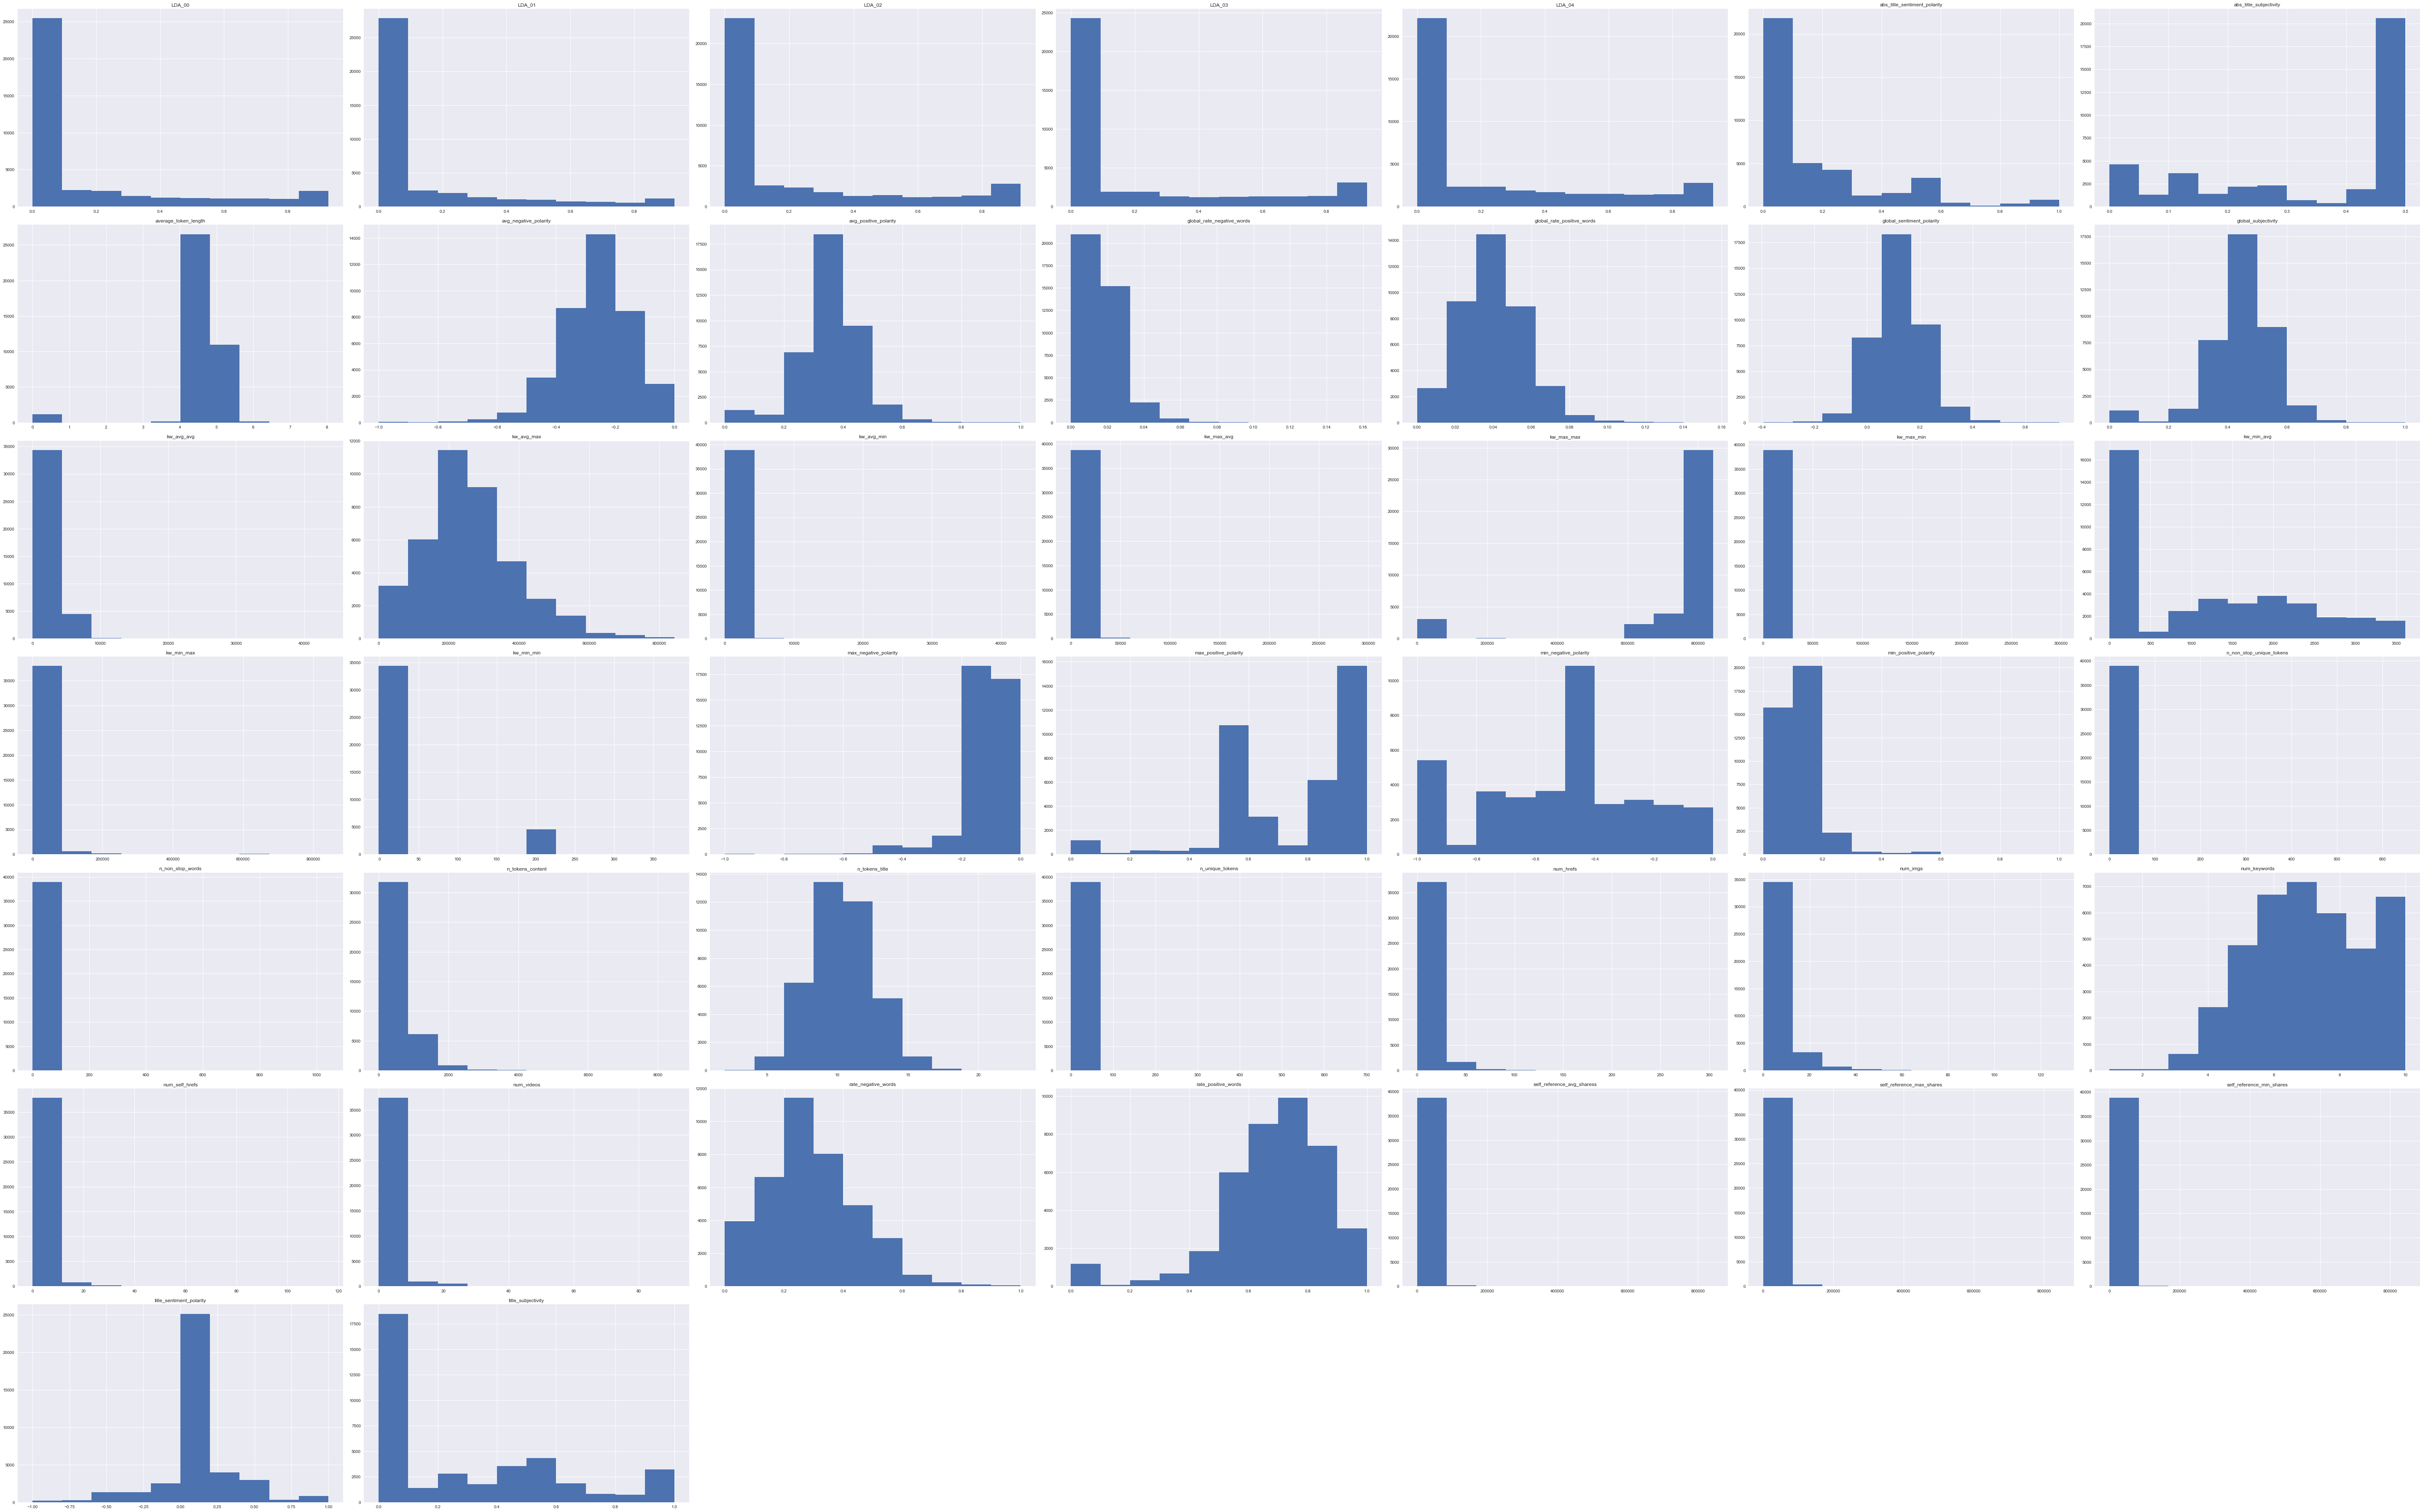

In [31]:
numerical.hist(alpha=1, figsize=(80, 50))
plt.tight_layout()
plt.show()

#### We can see that the majority of our numerical features have a skewed distribution

### Correlations & Heatmap

In [32]:
corr = df.corr()
corr['shares'].sort_values(ascending=True)

LDA_02                          -0.120173
data_channel_is_world           -0.105573
data_channel_is_entertainment   -0.047301
data_channel_is_bus             -0.043010
month                           -0.035989
average_token_length            -0.034521
avg_negative_polarity           -0.033337
rate_negative_words             -0.028870
LDA_01                          -0.025709
weekday_is_wednesday            -0.024094
n_tokens_title                  -0.022001
weekday_is_tuesday              -0.019733
min_negative_polarity           -0.019637
weekday_is_thursday             -0.016848
max_negative_polarity           -0.015846
weekday_is_monday               -0.004422
rate_positive_words             -0.001478
abs_title_subjectivity           0.000836
global_rate_negative_words       0.000878
weekday_is_friday                0.001410
kw_max_max                       0.001616
LDA_00                           0.002543
n_non_stop_unique_tokens         0.003666
n_unique_tokens                  0

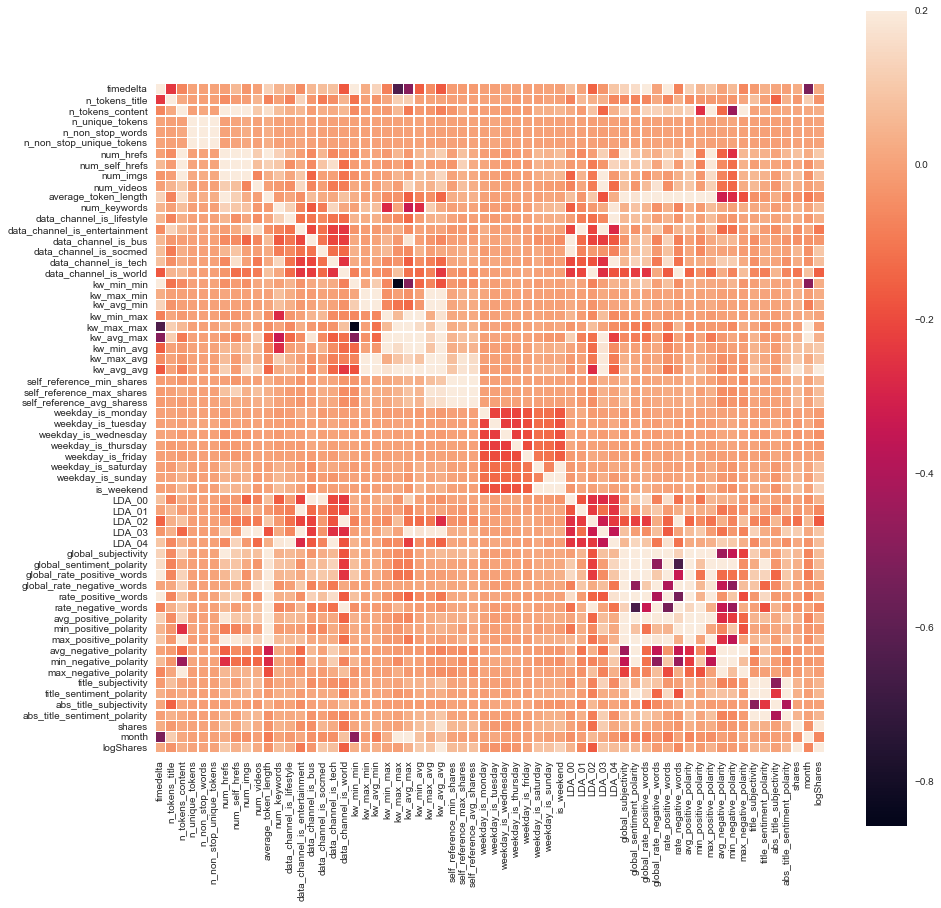

In [33]:
fx, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmax=0.2, square=True,  linewidth=.5)
plt.show()

#### From the heatmap and the correlations listed above, we can state that the variables in our dataset show low correlations.

# Data Standardization & PCA

### We'll use PCA to reduce the dimension of the feature space. 

In [34]:
y = np.log1p(df['shares'])
X = df.drop(['shares', 'logShares', 'timedelta'], axis=1)
#expm1

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
Xs = scaler.fit_transform(X.values)
Xs = pd.DataFrame(Xs, index=X.index, columns=X.columns)

#### We'll choose to keep 40 components, so we'll keep around 98% of our variance.

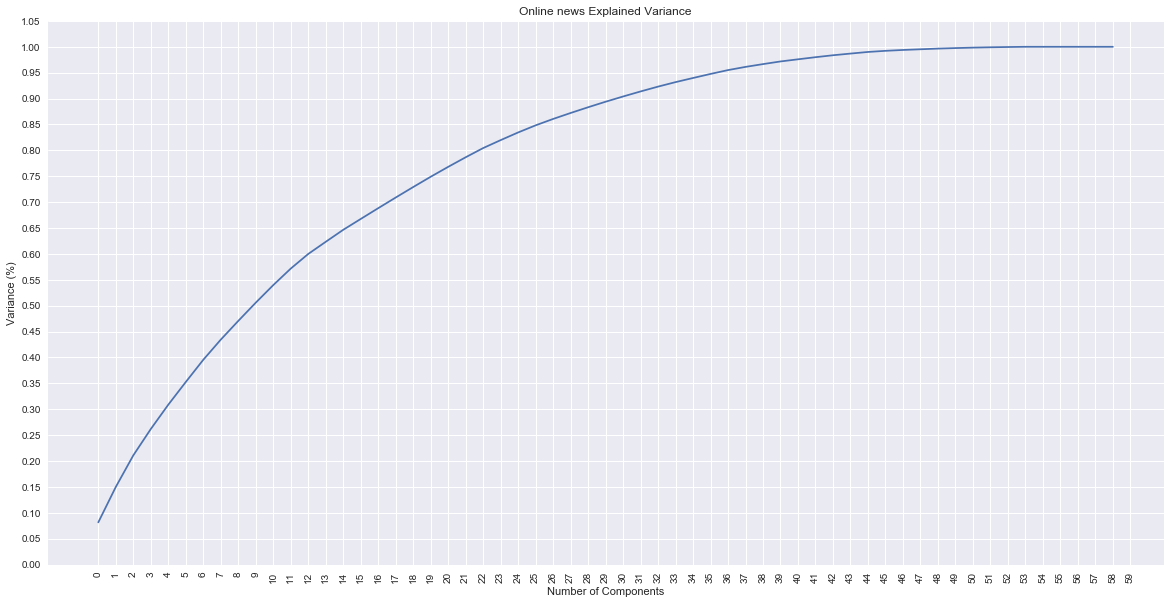

In [36]:
pca = PCA().fit(Xs)

plt.figure(figsize= (20, 10 ))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.1, step=0.05))
plt.xticks(np.arange(0, 60, step=1), rotation=90)

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Online news Explained Variance')

plt.show()

In [37]:
pca = PCA(n_components = 40)
pca.fit(Xs)
Xpca = pca.transform(Xs)

Xpca.shape

(38961, 40)

 # MODELING 

## Model Selection

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


#### We'll try many models and choose the one with best metrics

In [39]:
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.2, random_state=7)

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((31168, 40), (31168,), (7793, 40), (7793,))

In [41]:
Test = []
Test.append(('RFR', RandomForestRegressor()))
Test.append(('LinearR', LinearRegression()))
Test.append(('LASSO', Lasso()))
Test.append(('ElasticN', ElasticNet()))
Test.append(('KNN', KNeighborsRegressor()))
Test.append(('DTR', DecisionTreeRegressor()))
Test.append(('GBM', GradientBoostingRegressor()))


In [42]:
names = []
MAE = []
RMSE = []
R2 = []
MSE = []
EV = []

for name, model in Test:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    EV.append(explained_variance_score(y_test, y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))
    R2.append(r2_score(y_test, y_pred))
    MSE.append(mean_squared_error(y_test, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    names.append(name)

FirstEval = pd.DataFrame({'Name': names, 'MAE': MAE, 'RMSE': RMSE, 'R2': R2, 'MSE': MSE, 'EV': EV}).sort_values(by='MAE', ascending=True)
FirstEval

,Name,MAE,RMSE,R2,MSE,EV
6,GBM,0.597298,0.782048,0.119522,0.611600,1.195689e-01
1,LinearR,0.601101,0.788042,0.105975,0.621009,1.060234e-01
0,RFR,0.625743,0.815324,0.043001,0.664753,4.400889e-02
4,KNN,0.638849,0.840038,-0.015895,0.705663,-1.427586e-02
2,LASSO,0.652332,0.833447,-0.000016,0.694633,1.110223e-16
3,ElasticN,0.652332,0.833447,-0.000016,0.694633,1.110223e-16
5,DTR,0.863521,1.133485,-0.849623,1.284789,-8.482257e-01


#### Considering the scores above will choose GBM, we'll see visually why GBM is better than Linear Regression and Random Forest

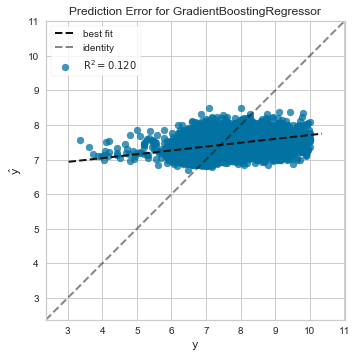

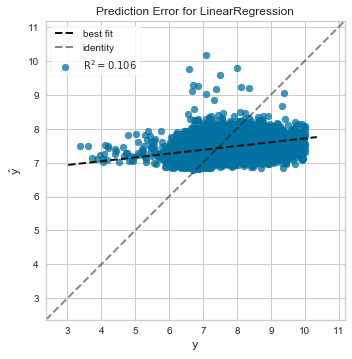

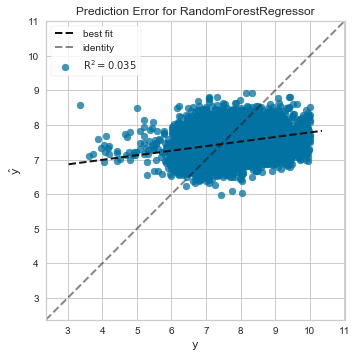

In [43]:
model1 = GradientBoostingRegressor(random_state=7)
model2 = LinearRegression()
model3 = RandomForestRegressor(random_state=7)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

from yellowbrick.regressor import PredictionError

visualizer1 = PredictionError(model1)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
g1 = visualizer1.poof()             # Draw/show/poof the data

visualizer2 = PredictionError(model2)
visualizer2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)  # Evaluate the model on the test data
g2 = visualizer2.poof()             # Draw/show/poof the data

visualizer3 = PredictionError(model3)
visualizer3.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer3.score(X_test, y_test)  # Evaluate the model on the test data
g3 = visualizer3.poof()             # Draw/show/poof the data

# Feature Selection

#### To build a better model, we'll remove the features with a feature_importance lesser than 0.1

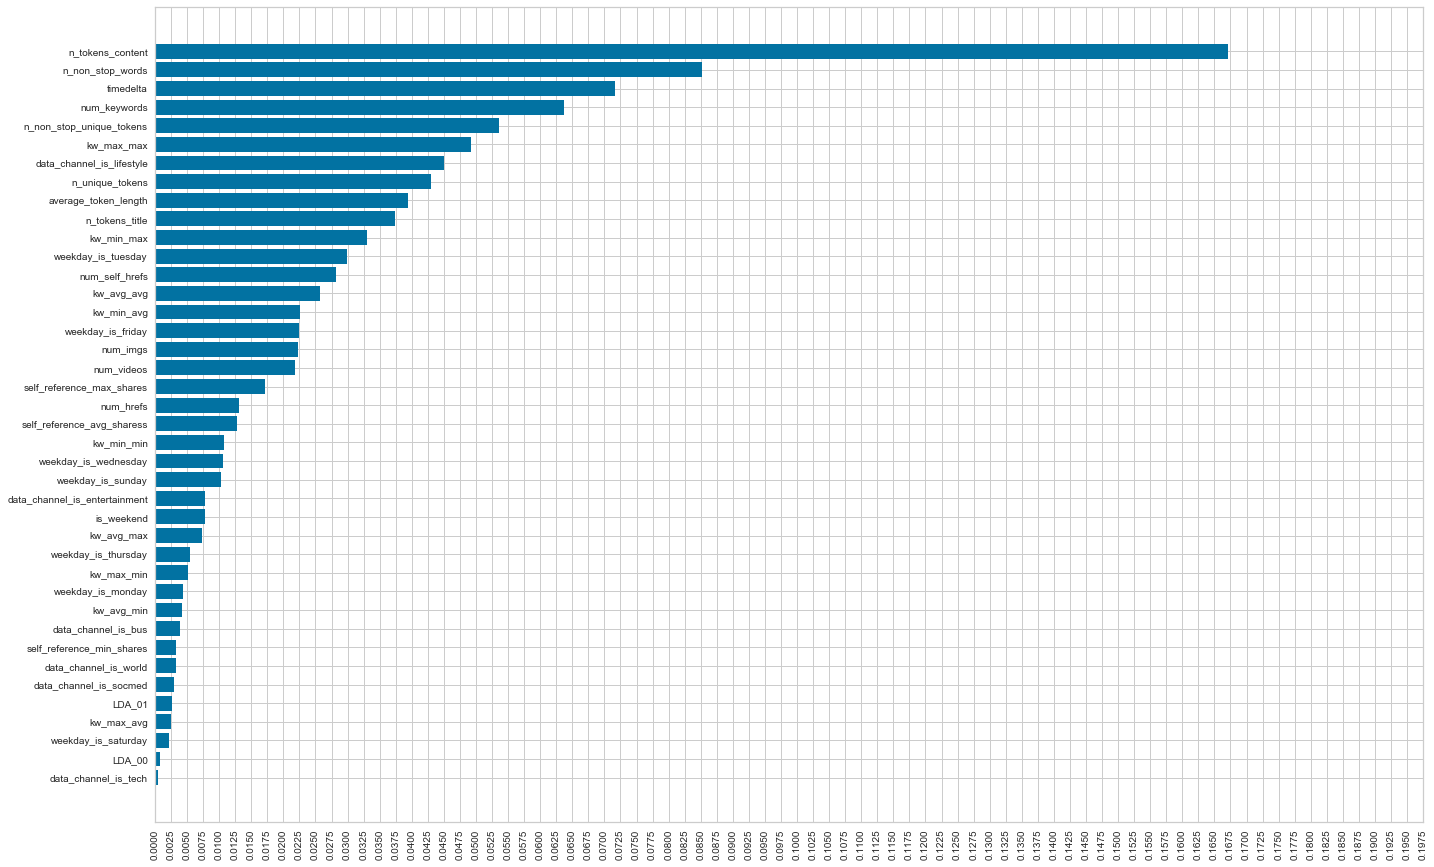

In [44]:
feature_importance = model1.feature_importances_

sortedfeature_importance = np.argsort(feature_importance)
pos = np.arange(sortedfeature_importance.shape[0]) + .5
plt.figure(figsize=(50,15))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sortedfeature_importance], align='center')
plt.xticks(np.arange(0, 0.2, step=0.0025), rotation=90)
plt.yticks(pos, df.columns[sortedfeature_importance])
plt.show()

In [45]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(model1, threshold=0.01)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...ate=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.01)

In [46]:
X_trainImportant = sfm.transform(X_train)
X_testImportant = sfm.transform(X_test)

model1.fit(X_trainImportant, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

#### Visualisation of our Feature Selection on the distribution of our PREDICTIONS 

#### First plot BEFORE feature selection, 2nd plot AFTER.

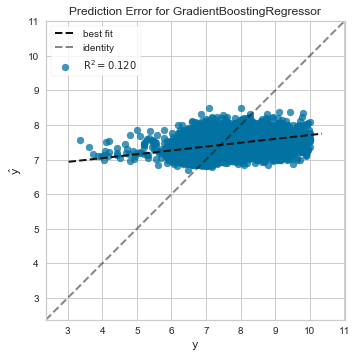

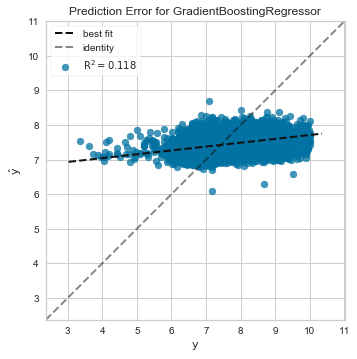

In [47]:
from yellowbrick.regressor import PredictionError
visualizer1 = PredictionError(model1)
visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)  # Evaluate the model on the test data
g1 = visualizer1.poof()             # Draw/show/poof the data


visualizer2 = PredictionError(model1)
visualizer2.fit(X_trainImportant, y_train)  # Fit the training data to the visualizer
visualizer2.score(X_testImportant, y_test)  # Evaluate the model on the test data #threshold = 0.075
g2 = visualizer2.poof()             # Draw/show/poof the data


# Hyperparameters Tuning 

### TUNING - STEP 1 
##### We'll perform a RandomizedSearchCV to narrow down the range for each hyperparameter

In [48]:
from pprint import pprint 

print('Standard Model Parameters :\n')
pprint(model1)

Standard Model Parameters :

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [49]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in GBM 
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 10)]

# Learning Rate value
learning_rate = [0.1, 0.4, 0.7, 0.9]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 60, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'learning_rate': [0.1, 0.4, 0.7, 0.9],
 'max_depth': [1, 7, 14, 20, 27, 33, 40, 46, 53, 60],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [5, 10, 15],
 'n_estimators': [1000, 1111, 1222, 1333, 1444, 1555, 1666, 1777, 1888, 2000]}


#### we'll make a cross-validation only on 3 folds so we'll get more data in every fold and we'll speed up computation


In [50]:
#GBM_random = RandomizedSearchCV(estimator = model1, param_distributions = random_grid, n_iter=100, cv =4, scoring='neg_mean_absolute_error', verbose=20, random_state=7, n_jobs = -1)

#GBM_random.fit(X_trainImportant, y_train)

#GBM_random.best_params_, GBM_random.best_estimator_

In [51]:
#GBM_random.best_params_, GBM_random.best_score_

In [52]:
params = {'n_estimators': 1777,
  'min_samples_split': 15,
  'min_samples_leaf': 4,
  'max_depth': 1,
  'learning_rate': 0.1}

In [53]:
TunedModel1 = GradientBoostingRegressor(random_state=7, n_estimators=1777, min_samples_split=15, min_samples_leaf=4, max_depth=1, learning_rate=0.1)
pprint(TunedModel1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=15, min_weight_fraction_leaf=0.0,
             n_estimators=1777, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


## First Tuning Evaluation

### Scoring Evaluation

#### To appreciate our model improvement, we will make a data frame with our standard and tuned model and their scorings.

In [54]:
TEST2 = []
TEST2.append(('GBM Standard', model1))
TEST2.append(('GBM TUNED', TunedModel1))


In [55]:
names = []
MAE = []
RMSE = []
R2 = []
MSE = []
EV = []

for name, model in TEST2:
    model.fit(X_trainImportant, y_train)
    y_pred = model.predict(X_testImportant)
    EV.append(explained_variance_score(y_test, y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))
    R2.append(r2_score(y_test, y_pred))
    MSE.append(mean_squared_error(y_test, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    names.append(name)

Evaluation = pd.DataFrame({'Name': names, 'MAE': MAE, 'RMSE': RMSE, 'R2': R2, 'MSE': MSE, 'EV': EV}).sort_values(by='MAE', ascending=True)

In [56]:
EvaluationTR = Evaluation.T
EvaluationTR.columns = EvaluationTR.iloc[0]
EvaluationTR = EvaluationTR.drop(EvaluationTR.index[0])

EvaluationTR['Improvement Percentage'] = abs(((EvaluationTR['GBM Standard'] - EvaluationTR['GBM TUNED']) / EvaluationTR['GBM Standard'])*100 )
EvaluationTR

Name,GBM TUNED,GBM Standard,Improvement Percentage
MAE,0.595869,0.597723,0.310165
RMSE,0.780551,0.782572,0.258272
R2,0.122891,0.118342,3.84331
MSE,0.609259,0.612419,0.515877
EV,0.122983,0.118386,3.88266


#### Visual Evaluation

#### First plot BEFORE tuning, 2nd plot AFTER.

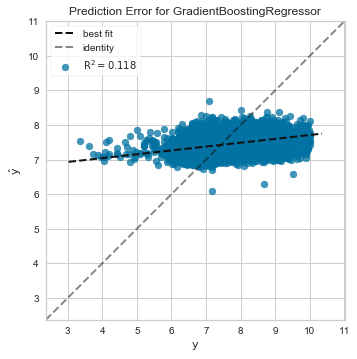

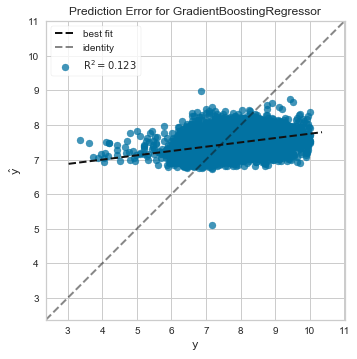

In [57]:
visualizerM1 = PredictionError(model1)
visualizerM1.fit(X_trainImportant, y_train)  # Fit the training data to the visualizer
visualizerM1.score(X_testImportant, y_test)  # Evaluate the model on the test data
g1 = visualizerM1.poof()             # Draw/show/poof the data

visualizerMT1 = PredictionError(TunedModel1)
visualizerMT1.fit(X_trainImportant, y_train)  # Fit the training data to the visualizer
visualizerMT1.score(X_testImportant, y_test)  # Evaluate the model on the test data
g1 = visualizerMT1.poof()             # Draw/show/poof the data


#### We can see that our tuned GBM is making better predictions than our standard one. It has also a better r-square score.

### Tuning STEP 2

#### We will try to take the tuning a step ahead with a GridSearch CV.

In [58]:
pprint(TunedModel1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=15, min_weight_fraction_leaf=0.0,
             n_estimators=1777, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [59]:
#from sklearn.model_selection import GridSearchCV


#param_grid={
#    'n_estimators': [ 1500, 1777, 2000],
#    'learning_rate': [0.1, 0.2, 0.5],
#    'max_depth': [1, 3, 7],
#    'min_samples_split': [12, 15, 18, 21],
#    'min_samples_leaf': [1, 4, 7],
#    'subsample': [0.85, 0.95, 1]
#}


#Subsample sets the fraction of samples to be used for fitting the individual base learners. 
    #values lower than 1 generally lead to a reduction of variance and an increase in bias

#grid_search = GridSearchCV(estimator = model1, param_grid = param_grid, 
#                           cv =4, scoring='neg_mean_absolute_error', verbose=20, n_jobs = -1)


In [60]:
#grid_search.fit(X_trainImportant, y_train)
#grid_search.best_params_


In [61]:
#grid_search.best_params_

In [62]:
LastParams = {'learning_rate': 0.1,
 'max_depth': 1,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 1777,
 'subsample': 0.85}

In [63]:
TunedModel2 = GradientBoostingRegressor(random_state=7, n_estimators=1777, min_samples_split=12, min_samples_leaf=4, max_depth=1, learning_rate=0.1, subsample=0.85)
pprint(TunedModel2)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=12, min_weight_fraction_leaf=0.0,
             n_estimators=1777, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=0.85, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


###  Second Tuning Evaluation

#### Scoring Evaluation

#### As we did in the first part of our tuning, we we'll make a dataframe with the standard model, 1st and 2nd model and add a column of overall improvement.

In [64]:
TEST3 = TEST2
TEST3.append(('GBM TUNED LAST', TunedModel2))


names = []
MAE = []
RMSE = []
R2 = []
MSE = []
EV = []

for name, model in TEST3:
    model.fit(X_trainImportant, y_train)
    y_pred = model.predict(X_testImportant)
    EV.append(explained_variance_score(y_test, y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))
    R2.append(r2_score(y_test, y_pred))
    MSE.append(mean_squared_error(y_test, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    names.append(name)

FinalEvaluation = pd.DataFrame({'Name': names, 'MAE': MAE, 'RMSE': RMSE, 'R2': R2, 'MSE': MSE, 'EV': EV}).sort_values(by='MAE', ascending=True)

In [65]:
FinalEvaluationTR = FinalEvaluation.T
FinalEvaluationTR.columns = FinalEvaluationTR.iloc[0]
FinalEvaluationTR = FinalEvaluationTR.drop(FinalEvaluationTR.index[0])

FinalEvaluationTR['Overall Improvement Percentage'] = abs(((FinalEvaluationTR['GBM Standard'] - FinalEvaluationTR['GBM TUNED LAST']) / FinalEvaluationTR['GBM Standard']) *100 )
FinalEvaluationTR

Name,GBM TUNED LAST,GBM TUNED,GBM Standard,Overall Improvement Percentage
MAE,0.595258,0.595869,0.597723,0.412429
RMSE,0.780321,0.780551,0.782572,0.287666
R2,0.123408,0.122891,0.118342,4.2801
MSE,0.6089,0.609259,0.612419,0.574505
EV,0.123495,0.122983,0.118386,4.31574


#### As we can see, we have made an improvement on MAE of approximately 0,4% and practically 4% on R2.

### Predictions


In [69]:
Predictions = np.expm1(TunedModel2.predict(X_testImportant))
Predictions

array([2021.36334345, 1103.23310985, 2053.77487585, ..., 1842.45593594,
       1209.61834175, 1634.19105066])

### Saving Model 


In [67]:
import joblib 

joblib.dump(TunedModel2, "FinalModel.pkl" )

['FinalModel.pkl']